<a href="https://colab.research.google.com/github/raaz0000002/pytorch_learning/blob/main/IRIS_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import torch
import torch.nn as nn
import torch.nn.functional as F


In [70]:
class Model(nn.Module):
    def __init__(self,in_features = 4,h1=8,h2=9,output_features = 3):                             # constrctor banaidim na
        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)
        self.fc2 = nn.Linear(h1,h2)
        self.fc3 = nn.Linear(h2,output_features)


                     # fc  = fully conneted
                     # remember the figure

       # making a function to move forward
    def forward (self,x):
      x = F.relu(self.fc1(x))
      x = F.relu(self.fc2(x))
      x = self.fc3(x)
      return x

In [71]:
#  performing Randomization
torch.manual_seed(41)

In [72]:
# creating instance model
model = Model()

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [74]:
df = pd.read_csv("/content/drive/MyDrive/isis data_ Neural Network/IRIS.csv")
df


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [75]:
# machine learning works better with numbers so changing the words to digits

df['species'] = df['species'].replace({
    'Iris-setosa': 0.0,
    'Iris-versicolor': 1.0,
    'Iris-virginica': 2.0
})

<ipython-input-75-17d31ec1b00d>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['species'] = df['species'].replace({


In [76]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [77]:
# setting X and Y as Test and Train
# variety(species) hamro output ho so eslai as Y BANAUXAU ==> REMOVE LAST COLUMN FOR MAKING X AND keep only last column for making Y
x = df.drop("species", axis =1)
y= df["species"]


In [78]:
# x and Y ko value check garna sakinxa
# converting to numpy arrays

x = x.values
y = y.values


In [79]:
from sklearn.model_selection import train_test_split

In [80]:
# x lai as an array herna sakinxa.
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state= 41)

In [81]:
# now lets make tensor
x_train = torch.FloatTensor(x_train)        #CONVERT X features to float tensors
x_test = torch.FloatTensor(x_test)
y_train = torch.LongTensor(y_train)          # convert Y features to float tensors
y_test = torch.LongTensor(y_test)            #longTensors are 64 bits integres

In [82]:
# set the criteria of model to measure the error
criterion = nn.CrossEntropyLoss()      #

# choosing an optimizer called adam optimizer
# lr is learning rate (if error down gayena vane after some iterations(epocs) we lower learning rate)
optimizer = torch.optim.Adam(model.parameters(),lr = 0.01)   # lower learning rate, longer time to learn
# parameters = fc1, fc2 and output layer.



In [83]:
# Assuming model = Model()
 #==> esari pani herna sakinxa
# Method 1: Simple iteration over parameters
for param in model.parameters():
    print(param.shape)  # Shows the shape of each parameter tensor
    print(param)        # Shows the actual values

# Method 2: With parameter names using named_parameters()
for name, param in model.named_parameters():
    print(f"Parameter name: {name}")
    print(f"Shape: {param.shape}")
    print(f"Values: \n{param}\n")

# Method 3: If you want to see all parameters at once as a state dict
print(model.state_dict())  # Returns a dictionary of all parameters

torch.Size([8, 4])
Parameter containing:
tensor([[-0.2636, -0.2734,  0.3005, -0.3308],
        [-0.2350,  0.2720, -0.3718,  0.2452],
        [ 0.3045,  0.1357,  0.0896,  0.1933],
        [ 0.3782,  0.0407, -0.3600,  0.4613],
        [ 0.3666, -0.0116, -0.2923, -0.1937],
        [-0.4415,  0.3314, -0.0434,  0.3445],
        [ 0.1883, -0.0992, -0.3197,  0.1740],
        [-0.3208, -0.1111,  0.2972, -0.2723]], requires_grad=True)
torch.Size([8])
Parameter containing:
tensor([-0.0245, -0.0679,  0.0573,  0.4814,  0.2923, -0.1877,  0.4425, -0.1626],
       requires_grad=True)
torch.Size([9, 8])
Parameter containing:
tensor([[ 0.1456,  0.1463, -0.0107, -0.3290,  0.3324, -0.0817,  0.2408, -0.2121],
        [-0.0361,  0.3031, -0.3068,  0.0136, -0.0046, -0.3022, -0.0685, -0.3241],
        [ 0.0764,  0.0595,  0.2023,  0.0088, -0.1424, -0.1275, -0.1320,  0.2750],
        [ 0.1133, -0.3520,  0.0632, -0.0472,  0.2579, -0.1034,  0.3086,  0.1093],
        [-0.3185,  0.0744, -0.0807,  0.1770, -0.3035, -

In [84]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (fc3): Linear(in_features=9, out_features=3, bias=True)
)>

In [85]:
print("y_pred shape:", y_pred.shape)  # Should be (batch_size, num_classes)
print("y_train shape:", y_train.shape)

y_pred shape: torch.Size([32, 2])
y_train shape: torch.Size([120])


In [86]:
# training our model
# Epochs --> running through all the training data in our network
epoch = 100    # number of training iterations
losses = []

# Assuming these are defined earlier:

# x_train = training data
# y_train = target labels

for i in range(epoch):
    # Forward pass
    y_pred = model(x_train)  # Typically just model(x_train), not model.forward()

    # Calculate loss
    loss = criterion(y_pred, y_train)

    # Store loss (need to convert from tensor to numpy) # also measure the loss
    losses.append(loss.detach().cpu().numpy())  # Added .cpu() for GPU compatibility    #--> tensor nai hunxa paxi detach vayera numpy hunxa


    # Print loss every 10 epochs
    if i % 10 == 0:
        print(f"Epoch {i} ==> loss: {loss.item()}")  # .item() for scalar value

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()              # Back Propagation garne to retrace the correct weight to adjust it accordingly.

    optimizer.step()
       # losses lai graph out garna sakinxa  .

Epoch 0 ==> loss: 1.1251550912857056
Epoch 10 ==> loss: 1.0096259117126465
Epoch 20 ==> loss: 0.8157405853271484
Epoch 30 ==> loss: 0.585706353187561
Epoch 40 ==> loss: 0.3999636471271515
Epoch 50 ==> loss: 0.26768800616264343
Epoch 60 ==> loss: 0.17942361533641815
Epoch 70 ==> loss: 0.12151690572500229
Epoch 80 ==> loss: 0.0860118493437767
Epoch 90 ==> loss: 0.06520850956439972


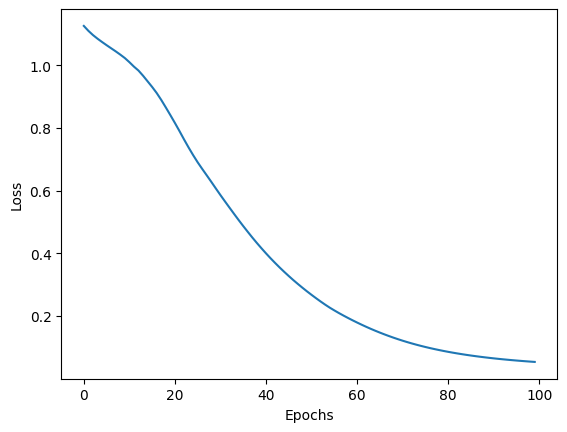

In [87]:
plt.plot(range(epoch),losses)
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.show()